# 한눈에 보는 머신러닝

## 머신러닝이란?

- 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구 분야. - 아서 새뮤얼
- 작업 T에 대한 컴퓨터 프로그램의 성능을 P로 측정했을때, 경험 E로 인해 성능이 향상됐다면 이 프로그램은 작업 T와 성능 측정 P에 대해 경험 E로 학습한 것. - 톰 미첼

## 머신러닝을 사용하는 이유
- 전통적인 프로그래밍 방식의 절차
    - 문제 연구
    - 규칙 작성
    - 평가
    - 오차 분석
    - Publishing
- 머신러닝(ML) 방식
    - 문제 연구
    - 머신러닝 알고리즘 훈련 <- 데이터를 주입
    - 솔루션 평가
    - 오차분석
    - Publishing

## 대표적인 머신러닝 애플리케이션
- 제품이미지를 보고 자동으로 분류
    - CNN
- 자동으로 뉴스 기사를 분류
    - NLP <- RNN, CNN, 트랜스폼
- 내년 회사의 수익을 예측
    - 회귀
- 음성을 듣고 이해하는 앱
    - RNN
- 구매 이력을 기반으로 고객 분류
    - 군집

## 머신러닝 시스템의 종류
- 훈련 감독 방법 : 지도 학습, 비지도 학습, 준지도 학습, 강화 학습
- 훈련 시점 : 온라인 학습과 배치 학습
- 모델 생성 : 사례 기반 학습과 모델 기반 학습

### 지도 학습
- 선형 회귀
- 로지스틱 회귀
- 서포트 벡터 머신
- 결정 트리와 앙상블
- 신경망

### 비지도 학습
- k-평균
- DBSCAN
- PCA
- 가우시안 혼합
- 오토인코더

### 준지도 학습, 강화 학습
- 준지도 학습 : 정답이 일부만 있는 경우
- 강화 학습 : 행동의 보상이 있는 경우
    - 관찰을 통해 정책에 따른 행동을 실행
    - 행동에 따라 보상이나 벌점을 받음
    - 보상이 최대가 될 수 있게 반복

### 온라인 학습과 배치 학습
- 온라인 학습
    - 적은 데이터를 사용해 점진적으로 훈련
    - 실시간 시스템이나 메모리가 부족할 경우 사용
- 배치 학습
    - 전체 데이터를 사용해서 오프라인에서 훈련
    - 컴퓨팅 자원이 풍부한 경우에 사용

### 사례 기반 학습 vs 모델 기반 학습
- 사례 기반 학습
    - 샘플을 기억하는 것이 훈련
    - 예측을 위해 샘플 사이의 유사도를 측정
- 모델 기반 학습
    - 샘플을 사용해 모델을 훈련
    - 훈련된 모델을 사용해서 예측

## 모델 기반 학습 예제
- 돈이 사람을 행복하게 만드는가?(1인당 GDP와 삶의 만족도 그래프)
- 삶의 만족도 = B0 + B1 x 1인당 GDP
- B0, B1 : 모델 파라미터
- 머신러닝이랑 데이터의 분포를 잘 설명할 수 있는 B0와 B1을 찾는 방법이다.

In [3]:
#실습 예제

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

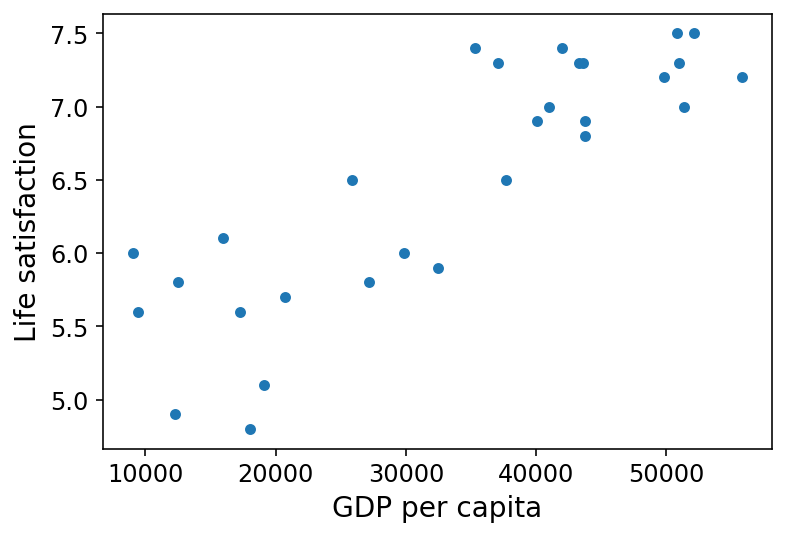

[[5.96242338]]


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
# np.c_는 [1,2,3], [4,5,6]을 [[1,4],[2,5],[3,6]]으로 바꿔줌
X = np.c_[country_stats["GDP per capita"]]
# [1,2,3]일 경우 [[1],[2],[3]]으로 나옴
# 혹은 country_status["GDP per capita"].to_numpy().reshape(-1,1)
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

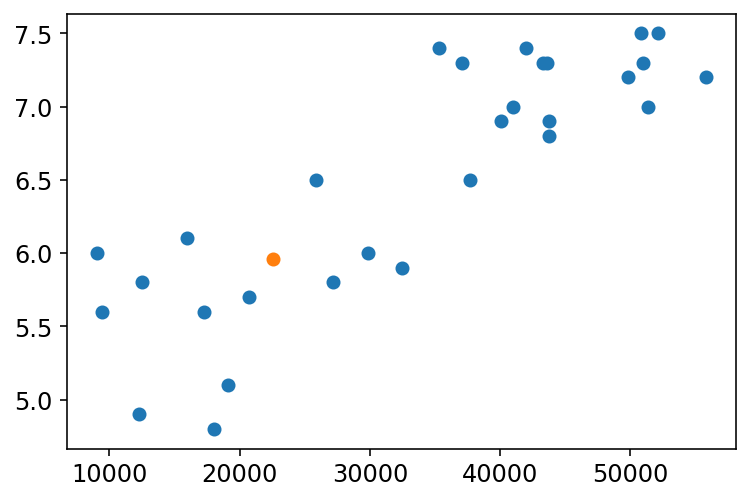

In [10]:
plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.show()

### 요약
- 데이터 준비(특성, 타깃)
- 모델 선택(선형 회귀)
- 모델 훈련(fit 메서드 호출)
- 새로운 데이터에 대한 예측 또는 추론(inference)

## 머신 러닝의 주요 도전 과제

### 충분하지 않은 양의 훈련 데이터
- 간단한 문제라도 수천 개의 데이터가 필요
- 이미지나 음성 인식 같은 문제는 수백만개가 필요.
- 딥러닝 발전의 원동력

### 대표성 없는 훈련 데이터
- 우연에 의해 대표성이 없는 데이터를 샘플링 잡음이라 함.
- 표본 추출 방법이 잘못된 대표성이 없는 데이터를 샘플링 편향이라 함.

### 낮은 품질의 데이터
- 이상치 샘플이라면 고치거나 무시
- 특성이 누락되었을 때
    - 해당 특성을 제외
    - 해당 샘플을 제외
    - 결측치를 채움
    - 해당 특성을 넣은 경우과 뺀 경우 각기 모델을 훈련

### 관련 없는 특성
- 특성 공학은 풀려는 문제에 관련이 높은 특성을 찾음
    - 특성 선택 : 준비되어 있는 특성 중 가장 유용한 특성을 찾음.
    - 특성 추출 : 특성을 조합하여 새로운 특성을 만듦.

### 과대 적합
- 훈련 세트에 너무 잘 맞아서 일반화 성능이 낮은 현상.
- 규제를 사용해 과대적합을 감소.

### 과소 적합
- 과대적합의 반대
- 모델이 너무 단순해서 훈련 세트를 학습하지 못함.
- 해결 방법
    - 모델 파라미터가 더 많은 모델을 사용.
    - 특성 공학으로 더 좋은 특성을 찾음.
    - 규제의 강도를 줄임.

### 테스트 세트와 검증 세트
- 모델의 일반화 성능을 측정하기 위해 훈련 세트와 테스트 세트로 나눔.
- 훈련 세트로 모델을 훈련하고 테스트 세트로 모델의 일반화 성능을 측정.
- 하이퍼파라미터는 알고리즘을 조절하기 위해 사전에 정의하는 파라미터.
- 테스트 세트를 사용해 여러 모델을 평가하면 테스트 세트에 과대적합됨.
- 모델 선택을 위해 훈련 세트, 검증 세트, 테스트 세트로 나눔

### 훈련 - 개발 세트
- 대량의 데이터를 얻기 위해 실전과 다른 데이터로 훈련 세트를 만들때
- 이런 경우 검증 세트 점수가 과대적합과 데이터 불일치 중 어떤 것이 원인인지 알 수가 없음.
- 해결 방안
    - 훈련 - 개발 세트 성능이 낮으면 과대 적합
    - 검증 세트 성능이 낮다면 데이터 불일치 문제